 # Bài tập thực hành tuần 2
 ## Bài tập 1:
 * Thực hành trên Python tính phương trình hồi quy đơn (trang 114 - 117 sách Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition).
 ### 1.Tạo một cái data-set như hình ![Data Set](data_set.jpg)
 * Import numpy module

In [1]:
import numpy as np


 * Theo mối tương quan với công thức Linear Regression là: y = $\theta_0$ + $\theta_1$$x1$ + $\epsilon$
 thì ta có thể tạo một biểu đồ với Intercept($\theta_0$) = 4 và Coefficients($\theta_1$) = 3

In [2]:
X = 2 * np.random.rand(100,1) 
y = 4 + 3 * X +np.random.randn(100,1)


 ### 2. Plot đồ thị

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()


<Figure size 640x480 with 1 Axes>

 ### 3. Tính $\hat{\theta}$ dựa trên công thức Normal Equation: $\hat{\theta}$ = ($X^T$ X)$^-$$^1$ $X^T$ y

In [4]:
X_b = np.concatenate((np.ones((100,1)),X), axis=1) # add x0 = 1 to each instance
# X_b = np.c_[np.ones((100, 1)), X]


 ### 4. Sử dụng sklearn package để tính $\hat{\theta}$
 Đầu tiên cần phải import sklearn

In [5]:
from sklearn import linear_model


 Sau đó chúng ta model data

In [6]:
Regress = linear_model.LinearRegression()
Regress.fit(X, y)
print('Intercept (Theta0) = ', Regress.intercept_[0])
print('Coeficients (Theta1) = ', Regress.coef_[0][0])


Intercept (Theta0) =  3.9588858172288104
Coeficients (Theta1) =  2.9798037735727485


In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta0 = theta_best[0][0]
theta1 = theta_best[1][0]
print('Intercept (Theta0) = ', theta0)
print('Coeficients (Theta1) = ', theta1)


Intercept (Theta0) =  3.9588858172288184
Coeficients (Theta1) =  2.9798037735727445


 ### 5. Sử dụng $\hat{\theta}$ để dự đoán kết quả mới
 * Code trong sách

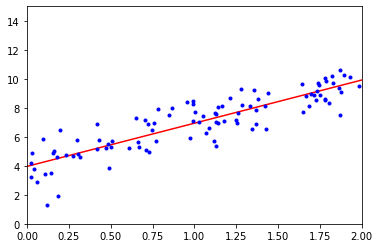

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


 * Code tự viết: Áp dụng công thức y = $\theta_0$ + $\theta_1$$x1$ + $\epsilon$ và plot đồ thị.

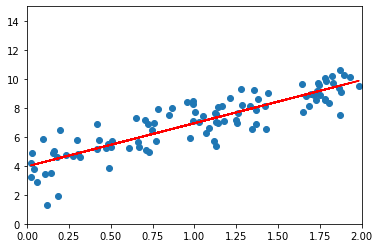

In [9]:
plt.plot(X, theta0 + theta1*X, color='red')
# plt.plot(X, y, "b.")
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])
plt.show()


 ## Bài tập 2
 * Sử dụng chương trình Python trang 114 - 117 sách Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition tính lại ví dụ mô phỏng ở slides 10 thuộc Tuần 2.

 ### 1. Import numpy module

In [10]:
import numpy as np


 ### 2. Create dataset: ($x_i$,$y_i$) = (147,49), (150,53), (153,51), (160,54)

In [11]:
X = np.array([147, 150, 153, 160])
y = np.array([49, 53, 51,54])


 ### 3. Tính phương trình hồi quy:
 * Chuyển $x_i$ về dạng \begin{bmatrix}1 & 147 \\1 & 150 \\1 & 153 \\1 & 160 \end{bmatrix}

In [12]:
X_b = np.c_[np.ones((4, 1)), X]
X_b


array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 160.]])

 * Tính $\hat\theta$

In [13]:
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_hat


array([5.01612903, 0.30645161])

 ### 4. Summary
 Vậy phương trình hồi quy cần tìm là: $y$ = 5.02 + 0.31$x$

 ## Bài tập 3
 * Thực hành với dữ liệu cho trong Sheet1 file Excel `demo-data.xls`.
 * Vẽ biểu đồ phân tán (biểu đồ Scatter) và nhận định về quan hệ giữa  $X$  và  $Y$ .
 * Thay đổi một giá trị của $Y$ sao cho thật khác biệt. Chạy chương trình và quan sát.

 ### 1. Import some modules

In [14]:
import matplotlib.pyplot as plt # To plot data
import numpy as np
import pandas as pd # Import data from excel file to dataframe
from sklearn import linear_model


 ### 2. Import data from Excel file to dataframe

In [15]:
df = pd.read_excel (r'demo_data.xls', 0) # Import data from Sheet1 to dataframe
df.head()

# ### 3. Data exploration
# * Summarize the data
df.describe()


,X,y
count,100.000000,100.000000
mean,0.964275,6.992829
std,0.601905,2.062290
min,0.018622,2.868843
25%,0.413276,5.338411
50%,0.893399,6.601847
75%,1.485164,8.401911
max,1.987546,11.663599


 * Select features

In [16]:
Feature = df[['X','y']]


 ### 4. Plot data

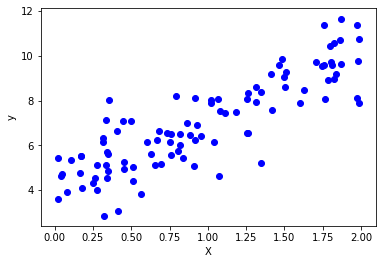

In [17]:
plt.scatter(Feature.X, Feature.y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


 ### 5. Correlation

In [18]:
Feature.X.corr(Feature.y, method = "pearson")


0.8559608516700882

 ### 6. Change $y$ element and run program again

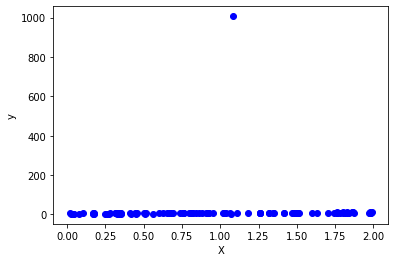

0.03706770723354903

In [19]:
RanIndex = np.random.randint(0,Feature.y.shape[0])
Feature.y[RanIndex] = Feature.y[RanIndex] + 999

plt.scatter(Feature.X, Feature.y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Feature.X.corr(Feature.y, method = "pearson")


 ### 7. Summary
 Sau khi thay đổi một giá trị $y$ bất kì sao cho thật khác
 biệt thì chúng ta đã tạo một điểm Outliner trên đồ thị
 và mối tương quan giữa $X$ và $y$ cũng bị thay đổi rõ rệt

 ## Bài tập 4
 * Phân tích hồi quy đa biến, cho dữ liệu về giá cổ phiếu demo-data-mul.xls.
 * Vẽ biểu đồ Scatter giữa giá cổ phiếu và các thuộc tính Interest Rate và Unemployment Rate
 * Tìm phương trình hồi quy của giá cổ phiếu theo hai thuộc tính (biến) Interest Rate và Unemployment Rate.

 ### 1. Import some modules

In [20]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


 ### 2. Import data from Excel file to dataframe

In [21]:
df = pd.read_excel('demo_data_mul.xls')
df.head()


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


 ### 3. Correlation

In [22]:
df.corr(method='pearson')


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
Year,1.000000,0.000000,0.882851,-0.877000,0.863232
Month,0.000000,1.000000,0.339526,-0.351189,0.481287
Interest_Rate,0.882851,0.339526,1.000000,-0.925814,0.935793
Unemployment_Rate,-0.877000,-0.351189,-0.925814,1.000000,-0.922338
Stock_Index_Price,0.863232,0.481287,0.935793,-0.922338,1.000000


 * Visualize using heat-map

 ### 3. Data Exploration

In [23]:
Feature = df[[
    'Interest_Rate',
    'Unemployment_Rate',
    'Stock_Index_Price'
]]


 ### 4. Vẽ biểu đồ scatter giữa `Interest_Rate` và `Stock_Index_Price`

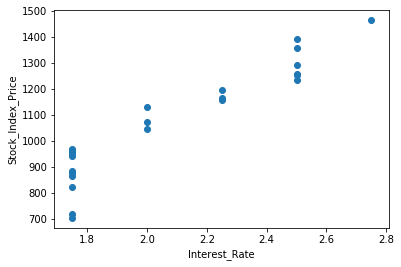

In [24]:
plt.scatter(Feature.Interest_Rate, Feature.Stock_Index_Price)
plt.xlabel("Interest_Rate")
plt.ylabel("Stock_Index_Price")
plt.show()


 ### 5. Vẽ biểu đồ scatter giữa `Unemployment Rate` và `Stock_Index_Price`

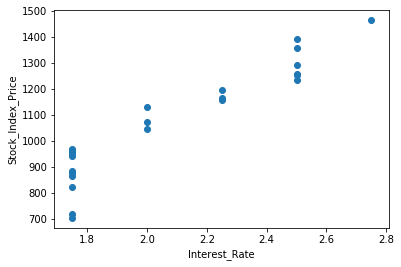

In [25]:
plt.scatter(Feature.Interest_Rate, Feature.Stock_Index_Price)
plt.xlabel("Interest_Rate")
plt.ylabel("Stock_Index_Price")
plt.show()


 ### 6. Tính Intercept và Coeficients để tìm ra phương trình hồi quy

In [26]:
Regress = LinearRegression()
x_train = df[['Interest_Rate', 'Unemployment_Rate']]
Regress.fit(x_train, Feature.Stock_Index_Price)
print('Intercept: ', Regress.intercept_)
print('Coeficients: ', Regress.coef_)


Intercept:  1798.403977625855
Coeficients:  [ 345.54008701 -250.14657137]


 ### 7. Summary
 * Ta rút ra được phương trình hồi quy: $y_hat$ = 1798.4039 + 345.5400 * `Interest_Rate` - 250.1465 * `Unemployment_Rate`

 ## Bài tập 5:
 * Thực hành với dữ liệu cho trong Sheet2 file Excel demo-data.xls.
 * Thực hiện các yêu cầu tương tự Bài tập 4.
 * Bỏ bớt biến và quan sát sự thay đổi các thông số trong bảng phân tích hồi quy.
 * Xác định phương trình hồi quy có chứa  $X^{2}_2$  và nhận xét các thông số (Tạo thêm 1 cột $X^{2}_2$).
 ### 1. Import some modules

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


 ### 2. Read file and import to dataframe

In [28]:
df = pd.read_excel('demo_data.xls', 1)
df.head()


,X1,X2,y
0,1,4.0,5
1,2,8.0,4
2,3,7.0,3
3,4,6.0,5
4,5,9.0,7


Text(0, 0.5, 'y')

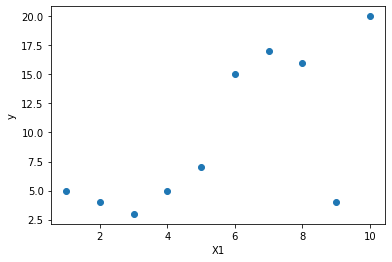

In [29]:
# ###  3. Plot data
plt.scatter(df[['X1']],df[['y']])
plt.xlabel('X1')
plt.ylabel('y')



Text(0, 0.5, 'y')

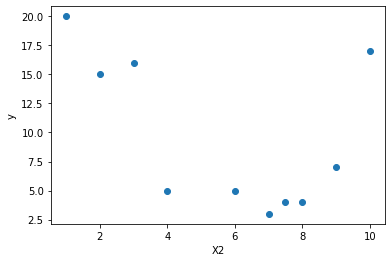

In [30]:
plt.scatter(df[['X2']],df[['y']])
plt.xlabel('X2')
plt.ylabel('y')



 ### 4. Linear Regression

In [31]:
x_train = df[['X1', 'X2']]
y_train = df[['y']]

Regress = LinearRegression()
Regress.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 ### 5. Calculate $\hat{\theta}$

In [32]:
print('Intercept: ', Regress.intercept_)
print('Coeficients: ', Regress.coef_)


Intercept:  [6.44449706]
Coeficients:  [[ 1.28988773 -0.68502253]]


 ### 6. Ta bỏ bớt X1 để xem sự thay đổi của $\hat{\theta}$

In [33]:
Regress.fit(df[['X2']], y_train)
print('Intercept: ', Regress.intercept_)
print('Coeficients: ', Regress.coef_)


Intercept:  [15.50948905]
Coeficients:  [[-1.02773723]]


 * Ta thấy rằng khi bỏ bớt X1 thì thì $\hat{\theta}$ thay đổi
 ### 7. Thêm vào cột $X^{2}_2$ để xem sự thay đổi của $\hat{\theta}$

In [34]:
X22 = np.full((10,1),8.0)
df['X22'] = X22
df.head()


,X1,X2,y,X22
0,1,4.0,5,8.0
1,2,8.0,4,8.0
2,3,7.0,3,8.0
3,4,6.0,5,8.0
4,5,9.0,7,8.0


In [35]:
x_train = df[['X1', 'X2', 'X22']]
y_train = df[['y']]
Regress = LinearRegression()
Regress.fit(x_train,y_train)
print('Intercept: ', Regress.intercept_)
print('Coeficients: ', Regress.coef_)


Intercept:  [6.44449706]
Coeficients:  [[ 1.28988773 -0.68502253  0.        ]]
